# Entropy Analysis

## Prolog

### Imports

In [91]:
from importlib import reload
import numpy as np          # Numeric Python
import scipy.stats as stats # Distribution functions and stuff
import sqlite3 as sql       # To fetch data
import analysis             # Own analysis tools
reload(analysis);           # force reload of analysis, for it will be changed often

import seaborn as sb        # Plots
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = analysis.a4_dims

import random

import warnings
warnings.filterwarnings('ignore')

### Table Schemes

In [52]:
analysis.print_table_schemes(
    'data/k3-v500-r4.1.db',
    'experiment',
    'algorithm_run',
    'search_run',
    'dist_1',
    'dist_2'
)

TABLE experiment
  NAME                 DATA_TYPE            PRIMARY_KEY
  id                   INTEGER              1
  experiment_name      TEXT                 0

TABLE algorithm_run
  NAME                 DATA_TYPE            PRIMARY_KEY
  id                   INTEGER              1
  experiment_id        INTEGER              0
  solver               TEXT                 0
  formula_fname        TEXT                 0
  max_clause_len       INTEGER              0
  variables            INTEGER              0
  clauses              INTEGER              0
  cb                   REAL                 0
  time                 INTEGER              0
  sat                  BOOL                 0

TABLE search_run
  NAME                 DATA_TYPE            PRIMARY_KEY
  id                   INTEGER              1
  algorithm_run_id     INTEGER              0
  flips                INTEGER              0
  minimal_unsat        INTEGER              0
  last_unsat           INTEGER          

## Analysis

### Entropy Distribution

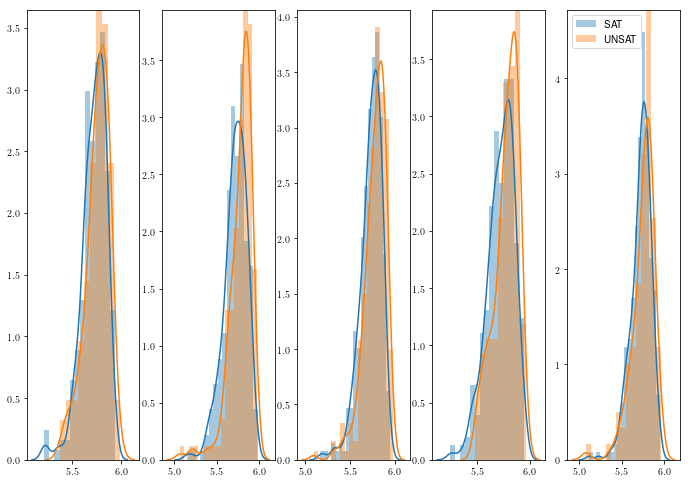

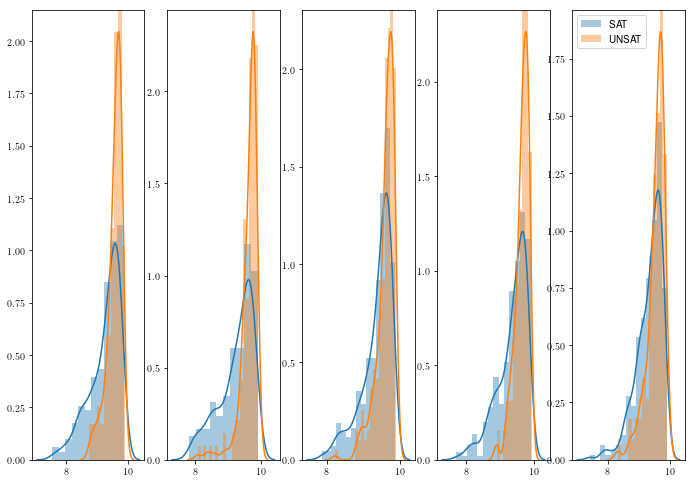

In [94]:
query = """
SELECT search_run.{}
FROM algorithm_run INNER JOIN search_run ON search_run.algorithm_run_id = algorithm_run.id
WHERE algorithm_run.experiment_id = ? AND algorithm_run.sat = ?
"""
   
samples = 5

with sql.connect('data/k3-v500-r4.1.db') as conn:
    c = conn.cursor()
    ids, = zip(*c.execute('SELECT id FROM experiment')) # Get experiment indices
    ids = random.sample(ids, samples)                         # Choose three experiments randomly
    
    XS_sat = [list(zip(*c.execute(query.format('h_1'),(exp_id,1))))[0] for exp_id in ids]
    
    YS_sat = [list(zip(*c.execute(query.format('h_2'),(exp_id,1))))[0] for exp_id in ids]
    
    XS_unsat = [list(zip(*c.execute(query.format('h_1'),(exp_id,0))))[0] for exp_id in ids]
    
    YS_unsat = [list(zip(*c.execute(query.format('h_2'),(exp_id,0))))[0] for exp_id in ids]
    
    

    figX, axesX = plt.subplots(1,samples)
    for i,X in enumerate(XS_sat):
        sb.distplot(X, label = 'SAT', ax = axesX[i], hist=True)
    for i,X in enumerate(XS_unsat):
        sb.distplot(X, label = 'UNSAT', ax = axesX[i], hist=True)
    plt.legend()
        
    figY, axesY = plt.subplots(1,samples)
    for i,Y in enumerate(YS_sat):
        sb.distplot(Y, label = 'SAT',ax = axesY[i], hist=True)
    for i,Y in enumerate(YS_unsat):
        sb.distplot(Y, label = 'UNSAT',ax = axesY[i], hist=True)
        
    plt.legend()
    